In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

In [2]:
df = pd.read_csv('sensors/n1.csv')

In [3]:
df.head()

,Unnamed: 0,UTC,day,month,hour,maxtempC,mintempC,DewPointC,WindGustKmph,cloudcover,humidity,pressure,tempC,precipMM,winddirDegree,windspeedKmph,pm25,pm10
0,0,2025-02-01 00:00:00,1,2,0,13.4,3.1,1.7,1.2,38.0,77.0,1028.1,5.5,0.0,309.0,1.2,NaN,NaN
1,1,2025-02-01 01:00:00,1,2,1,13.4,3.1,1.5,1.7,17.0,78.0,1028.6,5.1,0.0,311.0,1.7,NaN,NaN
2,2,2025-02-01 02:00:00,1,2,2,13.4,3.1,1.1,1.4,16.0,76.0,1028.6,4.9,0.0,310.0,1.4,NaN,NaN
3,3,2025-02-01 03:00:00,1,2,3,13.4,3.1,0.7,0.9,11.0,75.0,1028.6,4.7,0.0,307.0,0.9,NaN,NaN
4,4,2025-02-01 04:00:00,1,2,4,13.4,3.1,0.5,0.6,11.0,76.0,1028.8,4.4,0.0,342.0,0.6,NaN,NaN


WINDSPEEDKMPH GO IGNORIRAM BIDEJKI E ISTO SO WINDGUST KMPH, ISTO TAKA GO IGNORIRAME PRECIPMM 0 E SEKADE

In [4]:
df_clean = df.dropna(subset=['pm25', 'pm10','tempC', 'WindGustKmph','cloudcover','pressure','DewPointC'])

In [5]:
df_clean

,Unnamed: 0,UTC,day,month,hour,maxtempC,mintempC,DewPointC,WindGustKmph,cloudcover,humidity,pressure,tempC,precipMM,winddirDegree,windspeedKmph,pm25,pm10
154,154,2025-02-07 10:00:00,7,2,10,7.8,-1.6,-2.1,4.1,0.0,58.0,1036.4,5.4,0.0,105.0,4.1,0.0,0.0
442,442,2025-02-19 10:00:00,19,2,10,3.7,-4.3,-8.4,5.2,42.0,45.0,1032.1,2.5,0.0,2.0,5.2,0.0,0.0
633,633,2025-02-27 09:00:00,27,2,9,12.1,6.4,6.8,6.8,99.0,88.0,1020.5,8.6,0.0,27.0,6.8,0.0,0.0
634,634,2025-02-27 10:00:00,27,2,10,12.1,6.4,6.5,7.8,100.0,84.0,1020.0,9.1,0.0,7.0,7.8,0.0,0.0
635,635,2025-02-27 11:00:00,27,2,11,12.1,6.4,6.8,8.1,100.0,79.0,1019.1,10.2,0.0,348.0,8.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1556,2025-04-06 20:00:00,6,4,20,9.9,1.3,0.2,7.0,98.0,91.0,1015.6,1.4,0.6,247.0,7.0,1.5,1.8
1557,1557,2025-04-06 21:00:00,6,4,21,9.9,1.3,-0.3,5.9,97.0,89.0,1015.6,1.3,0.1,239.0,5.9,1.9,2.7
1558,1558,2025-04-06 22:00:00,6,4,22,9.9,1.3,-0.4,8.0,99.0,86.0,1015.4,1.7,0.0,245.0,8.0,2.5,2.8
1559,1559,2025-04-06 23:00:00,6,4,23,9.9,1.3,-0.7,8.1,96.0,85.0,1015.5,1.6,0.0,249.0,8.1,2.1,3.5


In [6]:
pollution_cols = ['pm25', 'pm10']
weather_cols = ['tempC', 'WindGustKmph','cloudcover','pressure','DewPointC'] 

In [7]:
def check_normality(data, columns):
    normality_results = {}
    for col in columns:
        stat, p = shapiro(data[col].dropna())
        normality_results[col] = 'Normal' if p > 0.05 else 'Not Normal'
    return normality_results

In [8]:
check_normality(df_clean,pollution_cols)

{'pm25': 'Not Normal', 'pm10': 'Not Normal'}

NEMAAT NORMALNA RASPREDELBA SHTO E I OCHEKUVANO, PRAVIME NEPARAMETARSKI TESTOVI

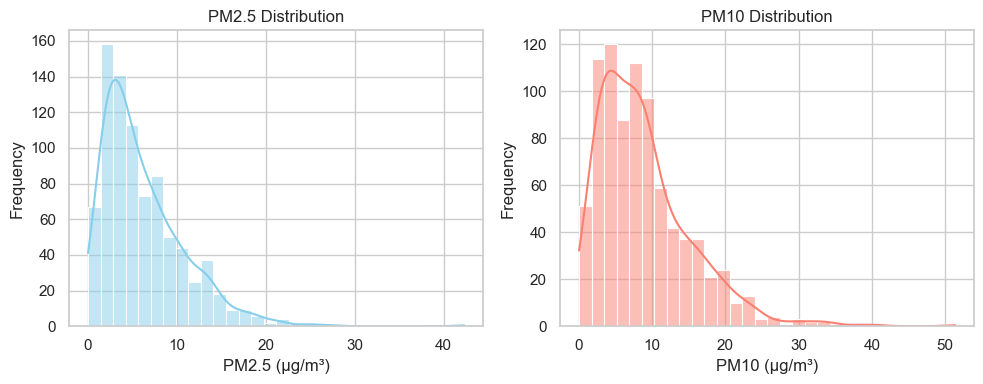

In [9]:
# Set up plot style
sns.set(style="whitegrid")

# Plot PM2.5
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['pm25'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('Frequency')

# Plot PM10
plt.subplot(1, 2, 2)
sns.histplot(df_clean['pm10'].dropna(), bins=30, kde=True, color='salmon')
plt.title('PM10 Distribution')
plt.xlabel('PM10 (μg/m³)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

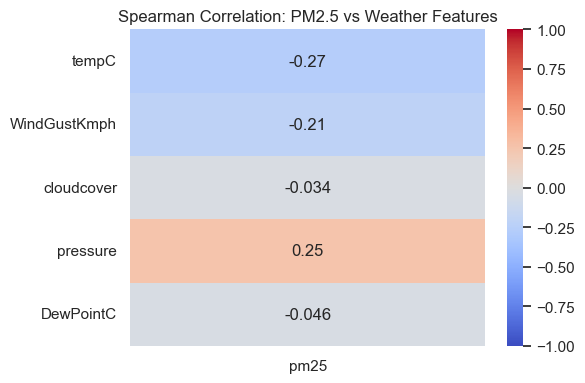

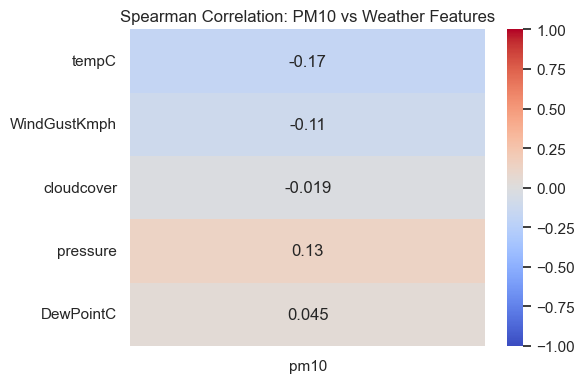

In [10]:
### --- Correlation: PM2.5 vs Weather ---
pm25_corr = df_clean[weather_cols + ['pm25']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(pm25_corr[['pm25']].drop('pm25'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation: PM2.5 vs Weather Features')
plt.tight_layout()
plt.show()

### --- Correlation: PM10 vs Weather ---
pm10_corr = df_clean[weather_cols + ['pm10']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(pm10_corr[['pm10']].drop('pm10'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation: PM10 vs Weather Features')
plt.tight_layout()
plt.show()

NAJV MAX TEMP E BEZVEZE, KE TREBA DA SE TRGNE, DA OSTANAT PRESSURE, CLOUDCOVER, WINDGUST, DEWPOINT I TEMPC